In [8]:
import os
import pandas as pd
import sys
import warnings
working_dir = os.getcwd()
if working_dir.endswith("drivenData/pumpitup/notebooks"):
    os.chdir("../")
print(os.getcwd())
import matplotlib.pyplot as plt
import seaborn as sns
from src.data import make_dataset
import math

/Users/karun/Desktop/drivenData/pumpitup


In [9]:
training_data = make_dataset.merge("../data/raw/trainingdata.csv","../data/raw/traininglabels.csv",for_eda = True)

In [10]:
training_data.shape

(59400, 41)

In [11]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', 50):
    display(training_data.head())

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [12]:
training_data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [13]:
cols_to_drop = ['date_recorded','wpt_name','recorded_by']

Check to see what is lowest level of factor in the location hierarchy (basin, subvillage, region, district etc.)


In [14]:
region_features = ['basin','subvillage','region', 'region_code', 'district_code','lga','ward']
region_df = training_data[region_features].drop_duplicates()
region_df

,basin,subvillage,region,region_code,district_code,lga,ward
0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi
1,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta
2,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika
3,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu
4,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi
5,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa
6,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye
7,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo
8,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia
9,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho


In [15]:
import random 
def determine_lowest_granularity(subset):
    if not (isinstance(region_df, pd.core.frame.DataFrame)):
        raise TypeError("Type exception occured. Expecting a dataframe.")
    cols = subset.columns
    cols =[col for col in cols if subset[col].isna().sum() == 0] #remove columns with NA
    df_shape = subset.shape
    store = {}
    max_val = 0
    for col in cols:
        unique_cols = subset[col].unique()
        len_unique_vals = len(unique_cols)
        store[col] = len(unique_cols)
        if max_val <= len_unique_vals:
            max_val = len_unique_vals
            key = col
        
    return key,store    

In [16]:
lowest_granularity, store = determine_lowest_granularity(region_df)
print(lowest_granularity)

ward


As we now established that `ward` has the lowest granularity(among the non-na features), we can safely ignore the rest of the location features without loss of information.

In [17]:
cols_to_drop = cols_to_drop + [col for col in region_features if col!=lowest_granularity]
print(cols_to_drop)

['date_recorded', 'wpt_name', 'recorded_by', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga']


In [18]:
def get_na_columns(df,threshold):
    threshold_level = df.shape[0]*threshold
    return [c for c in df.columns if df[c].isna().sum() > threshold_level]
cols_to_drop = cols_to_drop + get_na_columns(training_data, 0.00)#Remove all NA columns for now

In [19]:
print(cols_to_drop)

['date_recorded', 'wpt_name', 'recorded_by', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']


Let's go through each remaining feature one by one.

In [20]:
remaining_cols = [col for col in training_data.columns if col not in cols_to_drop]
print(remaining_cols)

['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'ward', 'population', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']


In [21]:
t_df = training_data[remaining_cols]

#custom describe function
def describe_df(df):
    '''
        This will list out each column in the dataset with a brief summary of it's attributes.
        TODO:
            1. Add statistical properties for numeric columns
            2. Include the sample of non zero values for numeric columns
    '''
    if not (isinstance(df, pd.core.frame.DataFrame)):
        raise TypeError("Type exception occured. Expecting a dataframe.")
    df_cols = df.columns
    out_cols = ['name','type','first_five','last_five','unique_values','total_values','na_values']
    out_df = pd.DataFrame(columns = out_cols)
    for col in df_cols:
        out_dict = {}
        out_dict['name'] = col
        out_dict['type'] = df[col].dtype
        out_dict['first_five'] = list(df[col].head())
        out_dict['last_five']  = list(df[col].tail())
        out_dict['unique_values'] = len(df[col].unique())
        out_dict['total_values'] = len(df[col])
        out_dict['na_values'] = (df[col].isna().sum())
        out_df = out_df.append(out_dict, ignore_index =True)
    return out_df

In [22]:
class ValidationError(Exception):
    def __init__(self, message, errors):

        # Call the base class constructor with the parameters it needs
        super(ValidationError, self).__init__(message)
        print(errors)
def get_contingency_table(df):
    '''
        Used for visualising relationships between two categorical variables
    '''
    if not (isinstance(df, pd.core.frame.DataFrame)):
        raise TypeError("Type exception occured. Expecting a dataframe.")
    col_df = df.columns
    if (len(col_df) > 2):
        raise ValidationError("Dataframe must have only two columns.",col_df)
    return pd.crosstab(index = df[col_df[0]], columns = df[col_df[1]])
def get_color_map(target_variable):
    if target_variable == 'functional':
        return 'green'
    elif target_variable == 'non functional':
        return 'red'
    elif target_variable == 'funtional needs repair':
        return 'yellow'
def get_box_plot(df, target_column_index = 1):
    '''
        Used for visualising relationships between a continous variable (independent) and a categorical variable (dependent)
    '''
    if not (isinstance(df, pd.core.frame.DataFrame)):
        raise TypeError("Type exception occured. Expecting a dataframe.")
    col_df = df.columns
    if (len(col_df) > 2):
        raise ValidationError("Dataframe must have only two columns.",col_df)
    if target_column_index == 1:
        x_index,y_index = 1,0
    elif target_column_index == 0:
        x_index,y_index = 0,1
    else:
        raise ValidationError("target_column_index must be set to 0 or 1.",target_column_index)
    sns.boxplot(x=df.columns[x_index], y=df.columns[y_index], data=t_df)
    plt.show()

Feature Name:  id
Feature Type:  int64
Sample Data:  [69572, 8776, 34310, 67743, 19728] ...... [60739, 27263, 37057, 31282, 26348]


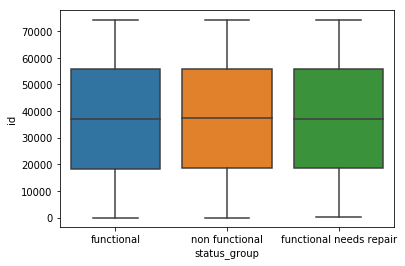

Feature Name:  amount_tsh
Feature Type:  float64
Sample Data:  [6000.0, 0.0, 25.0, 0.0, 0.0] ...... [10.0, 4700.0, 0.0, 0.0, 0.0]


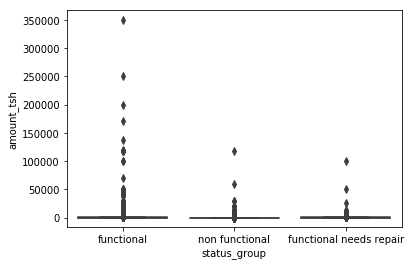

Feature Name:  gps_height
Feature Type:  int64
Sample Data:  [1390, 1399, 686, 263, 0] ...... [1210, 1212, 0, 0, 191]


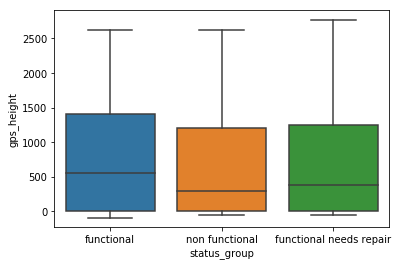

Feature Name:  longitude
Feature Type:  float64
Sample Data:  [34.93809275, 34.6987661, 37.46066446, 38.48616088, 31.13084671] ...... [37.16980689, 35.24999126, 34.01708706, 35.86131531, 38.10404822]


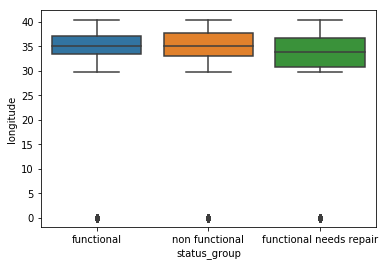

Feature Name:  latitude
Feature Type:  float64
Sample Data:  [-9.85632177, -2.14746569, -3.82132853, -11.15529772, -1.82535885] ...... [-3.25384746, -9.0706288, -8.75043433, -6.37857327, -6.74746425]


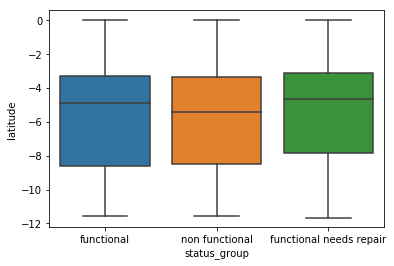

Feature Name:  num_private
Feature Type:  int64
Sample Data:  [0, 0, 0, 0, 0] ...... [0, 0, 0, 0, 0]


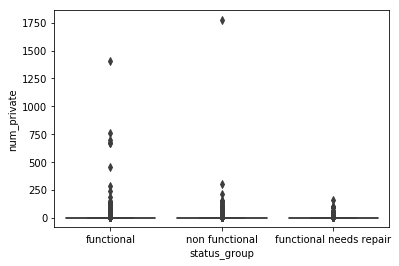

Feature Name:  ward
Feature Type:  object
Sample Data:  ['Mundindi', 'Natta', 'Ngorika', 'Nanyumbu', 'Nyakasimbi'] ...... ['Masama Magharibi', 'Ikondo', 'Chimala', 'Mvumi Makulu', 'Ngerengere']
status_group      functional  functional needs repair  non functional
ward                                                                 
Aghondi                    0                        0              12
Akheri                    27                        7              11
Arash                      7                        0               5
Arri                      14                        0               5
Arusha Chini              30                        0              27
Babayu                     5                        0               5
Badi                      16                        1              17
Badugu                     6                        0              11
Bahi                       8                        0               9
Balangidalalu              8        

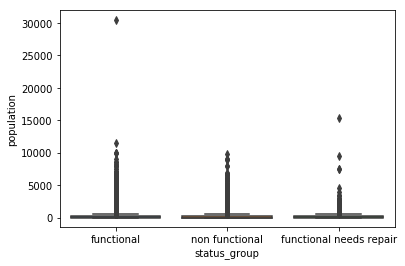

Feature Name:  construction_year
Feature Type:  int64
Sample Data:  [1999, 2010, 2009, 1986, 0] ...... [1999, 1996, 0, 0, 2002]


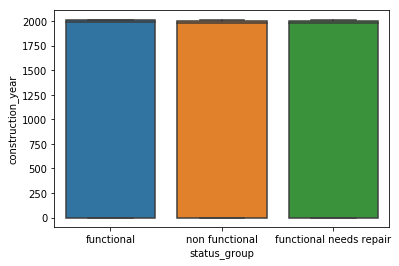

Feature Name:  extraction_type
Feature Type:  object
Sample Data:  ['gravity', 'gravity', 'gravity', 'submersible', 'gravity'] ...... ['gravity', 'gravity', 'swn 80', 'nira/tanira', 'nira/tanira']
status_group               functional  functional needs repair  non functional
extraction_type                                                               
afridev                          1200                       42             528
cemo                               45                        9              36
climax                              8                        0              24
gravity                         16048                     2701            8031
india mark ii                    1448                       79             873
india mark iii                     44                        1              53
ksb                               703                       26             686
mono                             1082                      129            1654
nira/tanira  

status_group    functional  functional needs repair  non functional
quantity_group                                                     
dry                    157                       37            6052
enough               21648                     2400            9138
insufficient          7916                     1450            5763
seasonal              2325                      416            1309
unknown                213                       14             562
Feature Name:  source
Feature Type:  object
Sample Data:  ['spring', 'rainwater harvesting', 'dam', 'machine dbh', 'rainwater harvesting'] ...... ['spring', 'river', 'machine dbh', 'shallow well', 'shallow well']
status_group          functional  functional needs repair  non functional
source                                                                   
dam                          253                       24             379
hand dtw                     497                       17             360
lake           

In [23]:
def helper_summarize(row,target_column, target_column_type):
    '''
        Based on the two columns that we want to see a relationship, this function will determine the appropriate
        visual to use.
    '''
    print("Feature Name: ", row['name'])
    print("Feature Type: ", row['type'])
    print("Sample Data: ",row['first_five'],"......",row['last_five'])
    temp_df = t_df[[row['name'],target_column]]
    if row['type'] == "object" and target_column_type == "object": #both categorical variables
        print(get_contingency_table(temp_df))
    elif row['type'] in ["int64","float64"] and target_column_type == "object": #continous
        get_box_plot(temp_df)

def summarize_dataset(df,dependent_variable = None):
    '''
        Initial validation and calling the helper_summarize function from here to get the plots/relationships.
        In this function, we also make an assumption on the target variable if nothing is provided by the user.
    '''
    if not (isinstance(df, pd.core.frame.DataFrame)):
        raise TypeError("Type exception occured. Expecting a dataframe.")
    if dependent_variable is None:
        dependent_variable = df.columns[-1]
        warning.warn("As the dependent_variable was not used, we assume that the last column of your dataframe as the dependent variable")
    df_ = describe_df(df)
    for idx,row in df_.iterrows():
        if row['name'] != dependent_variable:
            helper_summarize(row,dependent_variable,"object")
summarize_dataset(t_df,"status_group")

The above function might work well for datasets with less number of features, but it is impractical to use it for datasets with huge number of features as the output would be very long and it's difficult to grasp.

We go through the list one by one.

In [74]:
t_df.columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'ward', 'population', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [85]:
summary_df = describe_df(t_df)
summary_df

,name,type,first_five,last_five,unique_values,total_values,na_values
0,id,int64,"[69572, 8776, 34310, 67743, 19728]","[60739, 27263, 37057, 31282, 26348]",59400,59400,0
1,amount_tsh,float64,"[6000.0, 0.0, 25.0, 0.0, 0.0]","[10.0, 4700.0, 0.0, 0.0, 0.0]",98,59400,0
2,gps_height,int64,"[1390, 1399, 686, 263, 0]","[1210, 1212, 0, 0, 191]",2428,59400,0
3,longitude,float64,"[34.93809275, 34.6987661, 37.46066446, 38.4861...","[37.16980689, 35.24999126, 34.01708706, 35.861...",57516,59400,0
4,latitude,float64,"[-9.85632177, -2.14746569, -3.82132853, -11.15...","[-3.25384746, -9.0706288, -8.75043433, -6.3785...",57517,59400,0
5,num_private,int64,"[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",65,59400,0
6,ward,object,"[Mundindi, Natta, Ngorika, Nanyumbu, Nyakasimbi]","[Masama Magharibi, Ikondo, Chimala, Mvumi Maku...",2092,59400,0
7,population,int64,"[109, 280, 250, 58, 0]","[125, 56, 0, 0, 150]",1049,59400,0
8,construction_year,int64,"[1999, 2010, 2009, 1986, 0]","[1999, 1996, 0, 0, 2002]",55,59400,0
9,extraction_type,object,"[gravity, gravity, gravity, submersible, gravity]","[gravity, gravity, swn 80, nira/tanira, nira/t...",18,59400,0


         name     type                     first_five  \
1  amount_tsh  float64  [6000.0, 0.0, 25.0, 0.0, 0.0]   

                       last_five unique_values total_values na_values  
1  [10.0, 4700.0, 0.0, 0.0, 0.0]            98        59400         0  


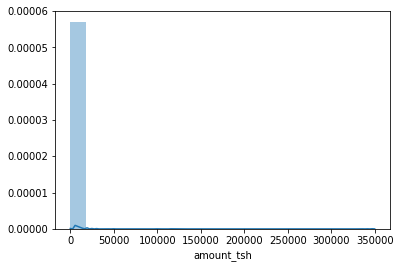

In [90]:
#amount_tsh
print(summary_df[summary_df['name'] == 'amount_tsh'],)
sns.distplot(t_df['amount_tsh'], bins = 20)
#As this is a numeric column, we keep this. We can come back later if we want to make any change/improvement
exclude_columns = []

         name   type                 first_five                last_five  \
2  gps_height  int64  [1390, 1399, 686, 263, 0]  [1210, 1212, 0, 0, 191]   

  unique_values total_values na_values  
2          2428        59400         0  


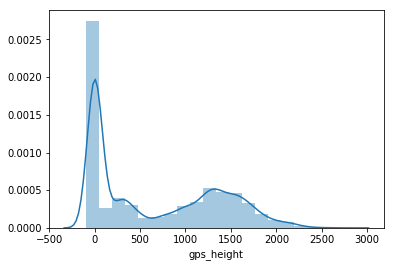

In [92]:
#gps_height
print(summary_df[summary_df['name'] == 'gps_height'],)
sns.distplot(t_df['gps_height'], bins = 20)
#we keep this as this shows enough variation.

In [ ]:
#latitude and longitude
#We are going to assume that the location of the water pump is not as powerful predictor as the other available features. So we drop it for now
#If we chose to include the geo data in some capacity, we can look into converting this into 3-D points.
exclude_columns = exclude_columns + ['longitude','latitude']



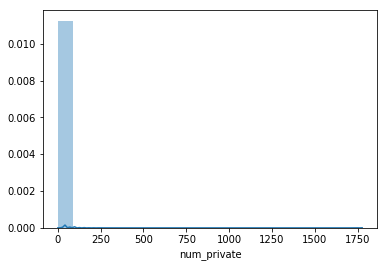

In [98]:
#num_private
sns.distplot(t_df['num_private'], bins = 20)
#t_df['num_private'].value_counts()
#As the info section in the problem dataset didn't have any mention of the num_private column and 
#the value counts show a good number of unique, we will keep this numeric column

In [99]:
#ward - we decided earlier that we would keep this. We might have to convert this into a dummy variable. Lets take a look.
t_df['ward'].describe()

count     59400
unique     2092
top       Igosi
freq        307
Name: ward, dtype: object

We have 2092 unique values for this column and it is not practical to introduce dummy columns for these.

In [100]:
t_df['ward'].value_counts()

Igosi               307
Imalinyi            252
Siha Kati           232
Mdandu              231
Nduruma             217
Mishamo             203
Kitunda             203
Msindo              201
Chalinze            196
Maji ya Chai        190
Usuka               187
Ngarenanyuki        172
Chanika             171
Vikindu             162
Mtwango             153
Matola              145
Zinga/Ikerege       141
Maramba             139
Wanging'ombe        139
Itete               137
Magomeni            135
Ifakara             134
Kikatiti            134
Olkokola            133
Maposeni            130
Igongolo            129
Mvomero             129
Mlangali            125
Nkoma               122
Nkungulu            121
                   ... 
Kapilula              1
Kitete                1
Mlimani               1
Sungwisi              1
Kirongo               1
Burungura             1
Mkumbi                1
Kinungu               1
Nsemulwa              1
Matarawe              1
Machinjioni     

Even if we plan to introduce dummy columns for few top values and replace others with "Other" place holder, we have a close competition among the top values. So for now, we will ignore this column as well. If we want to include the location feature, the coordinates look to be a good choice at this point. We will comeback to this.

In [101]:
exclude_columns.append('ward')

In [102]:
#population
t_df['population'].describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

This is a clear numeric column which would have an impact on the pump usage which inturn can determine the life of the pump. So we will keep it.

In [105]:
#construction_year
t_df['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

This is a very important feature as the the older the pump is, the higher it's chances of being ineffective, if all things are equal. But we can also see that there are a lot of records for which we don't have any information on the construction year. 

And we cannot directly treat this as a numeric column. Instead, we convert this into a pure numeric feature by reshaping it as "age". We take the newest pump construction year and use it as a baseline to get the age of each pump. The missing records will have the mean age as a filler i.e. mean imputation.

In [109]:
recent_year = t_df['construction_year'].max()

In [144]:
t_df['age'] = recent_year - t_df['construction_year']
tmp_list = t_df.loc[t_df['age'] != recent_year,]['age'].tolist()
mean_val = math.floor(sum(tmp_list)/len(tmp_list))
t_df.loc[t_df['age'] == recent_year,'age'] = mean_val #Mean Imputation
exclude_columns.append('construction_year')

We now encounter three different categories of variables that are similar to each other i.e. 'extraction_type','extraction_type_group','extraction_type_class'. We will now test how mutually dependent are these three. We will first compare 'extraction_type' and 'extraction_type_group'

In [176]:
def chi_squared_test(df, col_x, col_y, p_threshold):
    contingency_tmp = pd.crosstab(df[col_y],df[col_x])
    #(contingency_tmp)
    chi2, p, dof, expected = stats.chi2_contingency(contingency_tmp.values)
    if p <= p_threshold:
        #print("Correlated. Has a p-value of ",p)
        contingency_tmp
    else:
        print("Not Correlated. Has a p-value of  ",p)


In [148]:
chi_squared_test(t_df,'extraction_type','extraction_type_group',0.05)
chi_squared_test(t_df,'extraction_type','extraction_type_class',0.05)
chi_squared_test(t_df,'extraction_type_class','extraction_type_group',0.05)

Correlated. Has a p-value of  0.0
Correlated. Has a p-value of  0.0
Correlated. Has a p-value of  0.0


As expected, all these values are mutually corrleated. Let's test out our function by using two completely different features.

In [184]:
tmp_dict = [['A','X'],['B','Y'],['C','X'],['A','X'],['B','Y'],['C','Z']]
tmp_df = pd.DataFrame(tmp_dict,columns = ['C1','C2'])
tmp_df

,C1,C2
0,A,X
1,B,Y
2,C,X
3,A,X
4,B,Y
5,C,Z


In [185]:
chi_squared_test(tmp_df,'C2','C1',0.05)

Not Correlated. Has a p-value of   0.0915781944437


Even though A and B exhibit correlation, the p-value suggests there is still 9% chance of the above observation being due to random chance and hence we are unable to reject the null hypothesis.

Let's alter the dataframe a bit to reflect a futher more extreme case.

In [190]:
tmp_dict = [['A','X'],['B','X'],['C','X'],['A','Y'],['B','Y'],['C','Y']]
tmp_df = pd.DataFrame(tmp_dict,columns = ['C1','C2'])
tmp_df

,C1,C2
0,A,X
1,B,X
2,C,X
3,A,Y
4,B,Y
5,C,Y


In [191]:
chi_squared_test(tmp_df,'C2','C1',0.05)

Not Correlated. Has a p-value of   1.0


This confirms that we are able to detect the strong independence between two categorical variables when it is there using our chi squared test.